In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
import os
import os.path as Path

In [0]:
data_dir = Path.join('..','data')
url = Path.join(data_dir,'raw','hvc_annotations.csv')
url

'..\\data\\raw\\hvc_annotations.csv'

In [0]:
# if Path.isfile(url):
#     df = pd.read_csv(url)
#     df.head(2)
try:
    df = pd.read_csv(url)
except:
    raise
df.head(2)

In [0]:
df.drop('filename', axis=1, inplace=True)

In [0]:
df['old_image_path'] = df['image_path']
df['image_path'] = df['image_path'].apply(lambda x: Path.join(data_dir, 'raw', x))

In [0]:
df.head(2)

,gender,imagequality,age,weight,carryingbag,footwear,emotion,bodypose,image_path,old_image_path
0,male,Average,35-45,normal-healthy,Grocery/Home/Plastic Bag,Normal,Neutral,Front-Frontish,..\data\raw\resized/1.jpg,resized/1.jpg
1,female,Average,35-45,over-weight,None,Normal,Angry/Serious,Front-Frontish,..\data\raw\resized/2.jpg,resized/2.jpg


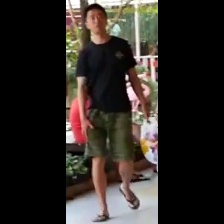

In [0]:
from IPython.display import Image
Image(df.image_path[0])

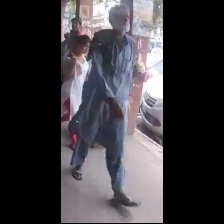

In [0]:
Image(df.image_path[100])

In [0]:
df.drop('old_image_path', axis=1, inplace=True)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13573 entries, 0 to 13572
Data columns (total 9 columns):
gender          13573 non-null object
imagequality    13573 non-null object
age             13573 non-null object
weight          13573 non-null object
carryingbag     13573 non-null object
footwear        13573 non-null object
emotion         13573 non-null object
bodypose        13573 non-null object
image_path      13573 non-null object
dtypes: object(9)
memory usage: 954.4+ KB


No null values

In [0]:
df.describe()

,gender,imagequality,age,weight,carryingbag,footwear,emotion,bodypose,image_path
count,13573,13573,13573,13573,13573,13573,13573,13573,13573
unique,2,3,5,4,3,3,4,3,13573
top,male,Average,25-35,normal-healthy,None,Normal,Neutral,Front-Frontish,..\data\raw\resized/10239.jpg
freq,7636,7509,5411,8628,7649,6038,9660,8383,1


In [0]:
caterogical_df = df.drop('image_path', axis=1)

In [0]:
caterogical_df.describe().T

,count,unique,top,freq
gender,13573,2,male,7636
imagequality,13573,3,Average,7509
age,13573,5,25-35,5411
weight,13573,4,normal-healthy,8628
carryingbag,13573,3,None,7649
footwear,13573,3,Normal,6038
emotion,13573,4,Neutral,9660
bodypose,13573,3,Front-Frontish,8383


In [0]:
categ_labels = caterogical_df.columns
for label in categ_labels:
    print(label.ljust(10), '\t : ', caterogical_df[label].unique())

gender     	 :  ['male' 'female']
imagequality 	 :  ['Average' 'Good' 'Bad']
age        	 :  ['35-45' '45-55' '25-35' '15-25' '55+']
weight     	 :  ['normal-healthy' 'over-weight' 'slightly-overweight' 'underweight']
carryingbag 	 :  ['Grocery/Home/Plastic Bag' 'None' 'Daily/Office/Work Bag']
footwear   	 :  ['Normal' 'CantSee' 'Fancy']
emotion    	 :  ['Neutral' 'Angry/Serious' 'Happy' 'Sad']
bodypose   	 :  ['Front-Frontish' 'Side' 'Back']


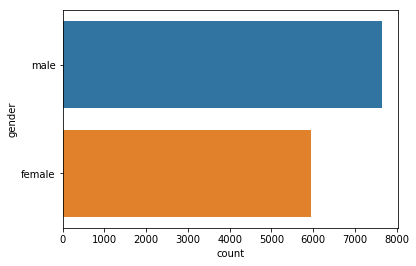

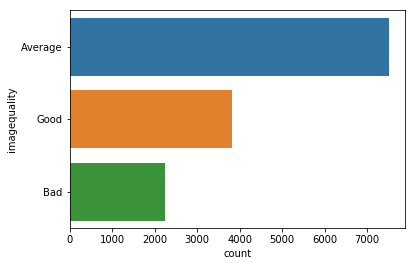

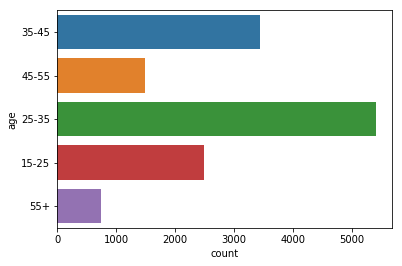

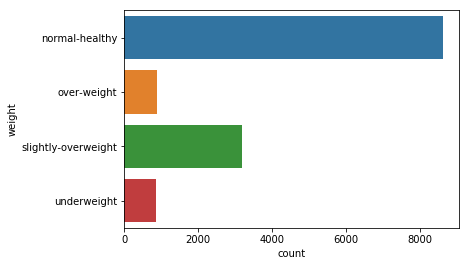

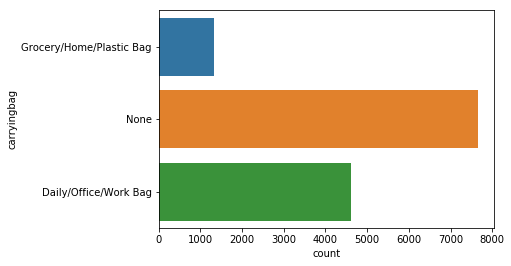

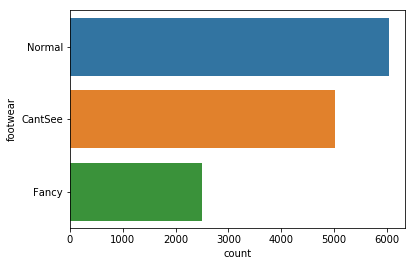

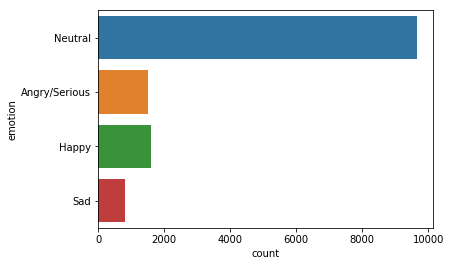

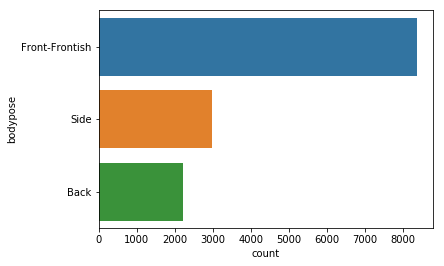

In [0]:
#Plots to analyze distribution of data in categories
for i,col in enumerate(caterogical_df):
    plt.figure(i)
    sns.countplot(y=caterogical_df[col])

In [0]:
cat_one_hot_df = pd.concat([pd.get_dummies(df[label], prefix=label) for label in categ_labels], axis=1)
cat_one_hot_df.head(2)

,gender_female,gender_male,imagequality_Average,imagequality_Bad,imagequality_Good,age_15-25,age_25-35,age_35-45,age_45-55,age_55+,...,footwear_CantSee,footwear_Fancy,footwear_Normal,emotion_Angry/Serious,emotion_Happy,emotion_Neutral,emotion_Sad,bodypose_Back,bodypose_Front-Frontish,bodypose_Side
0,0,1,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
1,1,0,1,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0


### Saving one_hot_encoded df and updated file path

In [0]:
cat_one_hot_df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender_female,13573.0,0.437413,0.496086,0.0,0.0,0.0,1.0,1.0
gender_male,13573.0,0.562587,0.496086,0.0,0.0,1.0,1.0,1.0
imagequality_Average,13573.0,0.553231,0.497177,0.0,0.0,1.0,1.0,1.0
imagequality_Bad,13573.0,0.165034,0.371224,0.0,0.0,0.0,0.0,1.0
imagequality_Good,13573.0,0.281736,0.449862,0.0,0.0,0.0,1.0,1.0
age_15-25,13573.0,0.183747,0.387292,0.0,0.0,0.0,0.0,1.0
age_25-35,13573.0,0.398659,0.489640,0.0,0.0,0.0,1.0,1.0
age_35-45,13573.0,0.253076,0.434790,0.0,0.0,0.0,1.0,1.0
age_45-55,13573.0,0.109777,0.312623,0.0,0.0,0.0,0.0,1.0
age_55+,13573.0,0.054741,0.227482,0.0,0.0,0.0,0.0,1.0


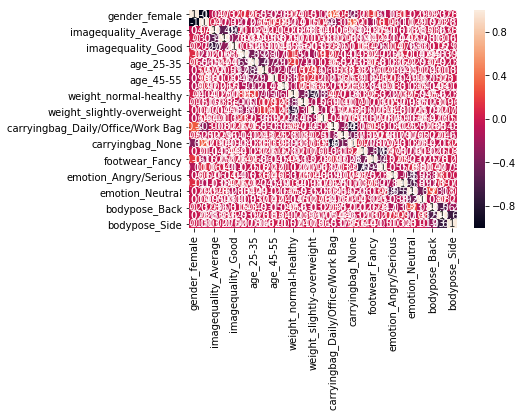

In [0]:
sns.heatmap(cat_one_hot_df.corr(), annot=True)
plt.show()

Since we have 27 columns the correlations heat map is incomprehensible.. Tried with categorical correlations which can be found at the end of the notebook, didn't spend much time exploring as I don't think that matter to the task at hand - added references to start with when revisited

# Saving processed data to file

In [0]:
# one_hot_df = pd.concat([pd.get_dummies(df[label], prefix=label) for label in labels], axis=1)
preprocessed_df = pd.concat([df["image_path"], cat_one_hot_df], axis=1)
preprocessed_df.head(2)

,image_path,gender_female,gender_male,imagequality_Average,imagequality_Bad,imagequality_Good,age_15-25,age_25-35,age_35-45,age_45-55,...,footwear_CantSee,footwear_Fancy,footwear_Normal,emotion_Angry/Serious,emotion_Happy,emotion_Neutral,emotion_Sad,bodypose_Back,bodypose_Front-Frontish,bodypose_Side
0,..\data\raw\resized/1.jpg,0,1,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
1,..\data\raw\resized/2.jpg,1,0,1,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0


In [0]:
output = Path.join(data_dir, 'interim', 'preprocessed_data.csv')

In [0]:
preprocessed_df.to_csv(output, index=False, columns=preprocessed_df.columns, mode='w')

In [0]:
# validating
try:
    vdf = pd.read_csv(output)
except:
    raise

vdf.head(2)

,image_path,gender_female,gender_male,imagequality_Average,imagequality_Bad,imagequality_Good,age_15-25,age_25-35,age_35-45,age_45-55,...,footwear_CantSee,footwear_Fancy,footwear_Normal,emotion_Angry/Serious,emotion_Happy,emotion_Neutral,emotion_Sad,bodypose_Back,bodypose_Front-Frontish,bodypose_Side
0,..\data\raw\resized/1.jpg,0,1,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
1,..\data\raw\resized/2.jpg,1,0,1,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0


### Categorical Correlations

In [0]:
# https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

# def cramers_v(x, y):
#     confusion_matrix = pd.crosstab(x,y)
#     chi2 = ss.chi2_contingency(confusion_matrix)[0]
#     n = confusion_matrix.sum().sum()
#     phi2 = chi2/n
#     r,k = confusion_matrix.shape
#     phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
#     rcorr = r-((r-1)**2)/(n-1)
#     kcorr = k-((k-1)**2)/(n-1)
#     return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))


In [0]:
# https://stackoverflow.com/a/48035423/7445772
from scipy.stats import chisquare
df1=caterogical_df.apply(lambda x : pd.factorize(x)[0])+1
corr = pd.DataFrame([chisquare(df1[x].values,f_exp=df1.values.T,axis=1)[0] for x in df1])
corr.columns = categ_labels
corr.index = categ_labels

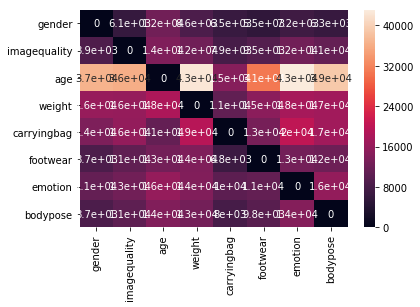

In [0]:
sns.heatmap(corr, annot=True)
plt.show()